In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

## Get genotypes

In [3]:
raw=pd.read_csv("/nrnb/users/mpagadal/tcga-genotypes/germline-immune/immune.snp.raw",delim_whitespace=True)
raw=raw.set_index("FID")
raw=raw.iloc[:,5:]

In [4]:
raw.columns=[x.split("_")[0] for x in raw.columns]

In [5]:
raw.head()

,1:1421752:G:A,1:7841330:G:A,1:7847836:C:T,1:7969014:G:A,1:7982816:G:A,1:10506667:A:G,1:10508679:C:T,1:78716854:T:C,1:79100762:A:T,1:88625636:A:C,...,19:55174498:T:C,19:55175740:C:T,19:55175983:T:A,19:55188593:G:C,19:55225076:C:A,20:8141433:G:T,20:50500689:T:A,20:50506724:G:C,20:59393575:C:T,21:46328099:C:T
FID,,,,,,,,,,,,,,,,,,,,,
TCGA-01-0628,0,0,2,0,1,1,0,0,0,1,...,0,2,0,2,0,2,0,0,0,2
TCGA-01-0630,1,0,2,0,2,1,1,0,0,1,...,0,0,0,1,0,1,0,0,1,1
TCGA-01-0633,1,0,1,1,1,1,0,0,1,2,...,1,1,1,0,1,0,0,0,0,1
TCGA-01-0636,1,0,0,2,0,1,0,0,0,1,...,0,1,0,0,2,2,0,0,1,0
TCGA-01-0637,2,0,0,1,0,1,1,0,1,1,...,0,1,0,0,0,2,0,0,0,1


## Filter for genotypes

In [ ]:
snps=

In [6]:
up="2:98347709:C:G 5:95972834:G:A 5:96206416:G:T 8:101861571:C:T 12:5441541:A:G 12:102308732:G:A 13:69647836:G:A 14:21247220:G:A 14:59489037:A:G 17:73681920:A:T 19:52020749:C:A"
up=up.split(" ")

In [7]:
down="3:159633885:T:C 3:190292390:G:T 4:176623544:A:T 5:95996549:G:A 6:58602122:A:G 6:58642502:T:C 7:25339328:G:A 10:69263787:T:C 10:69336294:T:C 10:81318488:G:A 11:66040049:C:G 12:69539703:C:T 12:90962342:A:G 16:77000005:A:C 19:15792996:T:G 19:54945174:G:A 20:59393575:C:T"
down=down.split(" ")

In [8]:
for x in down:
    mp={0:2,1:1,2:0}
    raw[x]=raw[x].map(mp)

In [9]:
raw_burden=raw[up+down]

In [18]:
raw_burden.head()

,FID,2:98347709:C:G,5:95972834:G:A,5:96206416:G:T,8:101861571:C:T,12:5441541:A:G,12:102308732:G:A,13:69647836:G:A,14:21247220:G:A,14:59489037:A:G,...,10:69336294:T:C,10:81318488:G:A,11:66040049:C:G,12:69539703:C:T,12:90962342:A:G,16:77000005:A:C,19:15792996:T:G,19:54945174:G:A,20:59393575:C:T,score
0,TCGA-01-0628,0,1,0,1,1,0,0,1,0,...,2,2,2,2,0,1,0,2,2,29
1,TCGA-01-0630,0,1,0,1,0,0,0,1,0,...,2,2,2,2,0,2,1,2,1,29
2,TCGA-01-0633,0,0,0,2,0,1,0,1,0,...,2,2,0,2,1,2,1,2,2,33
3,TCGA-01-0636,0,0,0,0,0,1,0,2,0,...,2,2,1,2,1,2,2,2,1,30
4,TCGA-01-0637,0,0,0,0,1,0,0,0,0,...,2,2,0,2,2,2,2,2,2,28


In [11]:
raw_burden["score"]=raw_burden.sum(axis=1) 

/nrnb/opt/anaconda3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Get phenotype

In [12]:
pheno=pd.read_csv("../processed_phenos/brian-tpm/tumor/pheno_all_zcancer",delimiter="\t")

In [13]:
raw_burden=raw_burden.reset_index()

In [14]:
raw_pheno=pd.merge(raw_burden,pheno,on="FID",how="left")

## plot burden

In [15]:
raw_pheno=raw_pheno[raw_pheno["Macrophage.Regulation"]!=-9]

In [16]:
raw_pheno["score"]=raw_pheno["score"]/(28*2)

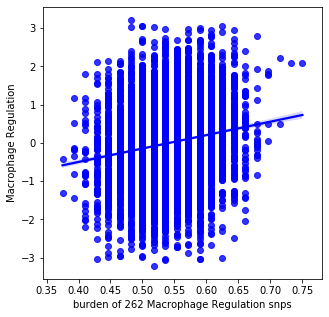

In [19]:
f=plt.figure(figsize=(5,5))
sns.regplot(x="score",y="Macrophage.Regulation",data=raw_pheno,color="blue")
plt.xlabel("burden of 262 Macrophage Regulation snps")
plt.ylabel("Macrophage Regulation")
plt.savefig("burden.pdf")

In [19]:
raw_pheno

,FID,2:98347709:C:G,5:95972834:G:A,5:96206416:G:T,8:101861571:C:T,12:5441541:A:G,12:102308732:G:A,13:69647836:G:A,14:21247220:G:A,14:59489037:A:G,...,LM22.Macrophages.M2,NSCLC.Fig2ab.B.cells,dice.CD8_STIM,dice.M2,dice.TH1,dice.TH17,HNSCC.Fibroblast,HNSCC.Endothelial,melanoma.CAF,melanoma.Macrophages
22,TCGA-02-0047,0,0,0,1,0,0,0,2,0,...,-0.674490,-0.367676,-0.175539,1.478237,-0.781640,-0.503299,0.030824,-0.259717,0.281029,0.503299
25,TCGA-02-0055,0,0,0,0,0,0,0,1,0,...,-0.929830,-1.788034,0.345780,0.457181,-0.674490,-0.259717,1.694534,-2.643857,2.643857,-0.154711
46,TCGA-02-2486,0,0,0,0,1,1,0,2,0,...,0.196444,-0.051388,-0.648915,0.345780,1.064979,0.781640,1.900427,-1.788034,0.367676,1.314956
60,TCGA-04-1357,1,0,0,1,0,0,0,1,0,...,-0.143105,-1.470674,-0.652943,-0.752544,2.381519,-0.787423,-1.197698,-0.311826,-1.496656,1.612301
62,TCGA-04-1362,0,0,0,0,0,0,0,1,0,...,0.663678,-0.741120,-0.741120,0.600346,-0.004322,-0.213375,-2.075599,1.097521,-1.036433,0.993042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,TCGA-ZS-A9CE,1,0,0,0,0,0,0,0,0,...,-1.587383,1.701989,0.301132,-0.428017,-1.153950,-0.936312,0.029669,0.044511,-0.444329,-0.239586
8213,TCGA-ZS-A9CF,0,0,0,1,0,0,0,0,0,...,0.209165,0.270231,0.579680,0.562222,-1.153950,-0.936312,-0.510834,0.707445,-0.826917,0.301132
8214,TCGA-ZS-A9CG,0,0,0,1,1,1,1,1,0,...,0.562222,-0.688522,0.428017,-1.032634,-0.428017,-0.285648,-0.363842,1.111688,-0.983333,0.411817
8215,TCGA-ZU-A8S4,0,1,0,1,1,1,0,0,0,...,0.674490,-2.128045,0.385320,0.041789,-1.191816,-0.477040,-0.041789,-1.036433,-0.296738,0.572968
